## Implementing multiple linear regression using numpy

In [3]:
'''
Name : ANMESH CHOUDHURY
Roll No: 16NA30003

Assignment 1a
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

'''
You will not import any other library other than these provided.

We provide the concrete_dataset as an example.
There are 8 dependent variables columns(1-8).
The last column (concrete compressive strength) is the value we wish to estimate.
'''

df= pd.read_csv('Concrete_Data.csv')
df.head()

# reads the file and stores in 2 numpy arrays.
# X has the input features and Y has the output value in numpy array

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape
# how to get the number of rows and columns in the dataset.
# Rows correspond to the number of input instances, columns correspond to the feature of an input

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

# write code to shuffle the dataset

def shuffle_dataset(X,Y):

    s = np.random.permutation(X.shape[0])
 
    X1=X[s]
    Y1=Y[s]
    
    return X1,Y1
    pass
X,Y=shuffle_dataset(X,Y)
training_size = int(0.8*rows)
X_train = X[:training_size]
y_train = Y[:training_size]
X_test = X[training_size:]
y_test = Y[training_size:]


1030 8


## Defining the Linear Regression class 

In [4]:
class LinearRegression(object):
    def __init__(self):
        #Initialize all parameters
        
        
        self.w = np.random.uniform(-1,1,(8,1))
        self.b = np.random.uniform(-1,1)
        
    def forward(self, x):
        return (np.matmul(x,self.w)+self.b)
        # Complete this function 
        
        raise NotImplementedError
        
    
    def backward(self, x, ypred, y_train, lr):
        x1=x*(ypred-y_train)
        
        self.w=self.w-2*lr*np.reshape(np.mean(x1,axis=0),(8,1))
        self.b=self.b-lr*2*np.mean((ypred-y_train))
        #raise NotImplementedError

    def MSELoss(self,y,ypred):
       
        return np.mean(np.multiply((ypred-y),(ypred-y)))
        # Compute the mean squared error 
        raise NotImplementedError


Starting Training with Gradient Descent
Loss fuction decrease after 10000 epochs of training


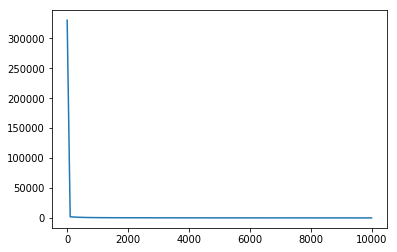

Final training loss: 426.276907885
Starting to test
Final test loss: 340.615817768


In [11]:
# Specify the number of epochs as well as the learning rate. 
# Keep the values fixed.

print('Starting Training with Gradient Descent')
lreg = LinearRegression()
epochs = 10000
learning_rate = 0.0000001

loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    ypred = lreg.forward(X_train) 
    ypred=np.reshape(ypred,(824,1))
    y_train=np.reshape(y_train,(824,1))
    loss = lreg.MSELoss(y_train,ypred) # computes the MSE loss between the actual and predicted values
    # store the values of loss per epoch
    if e==0 or (e+1)%100==0:
        loss_history.append(loss)
        epoch_history.append(e+1)
        
    
    lreg.backward(X_train, ypred, y_train, learning_rate)

print('Loss fuction decrease after ' + str(epochs) + ' epochs of training')
#Plot the decrease in loss with epoch
plt.plot(epoch_history, loss_history)
plt.show()

   
y_train_loss= lreg.MSELoss(Y,ypred)
print('Final training loss: '+str(y_train_loss))
print('Starting to test')
ytest_pred= lreg.forward(X_test)
loss=lreg.MSELoss(y_test, ytest_pred)
print('Final test loss: ' + str(loss))